In [113]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.optimize import curve_fit

In [114]:
import pandas as pd
df = pd.read_excel('data231211.xlsx')
df

,Global,filename_global,Ind1,filename_ind,Counter,filename_counter
0,1.0,ramsey_co_prop_rfsoc_015,1.0,ramsey_co_prop_rfsoc_020,1,ramsey_counter_prop_rfsoc_timescan_001
1,2.0,ramsey_co_prop_rfsoc_016,2.0,ramsey_co_prop_rfsoc_021,2,ramsey_counter_prop_rfsoc_timescan_002
2,NaN,NaN,3.0,ramsey_co_prop_rfsoc_023,3,ramsey_counter_prop_rfsoc_timescan_003
3,NaN,NaN,NaN,NaN,4,ramsey_counter_prop_rfsoc_timescan_004


In [14]:
def readFile(filename):
    timeTickFirst, timeTickLast, x, ion3, ion3_raw, ion3_bottom, ion3_top, ion4, ion4_raw, ion4_bottom, \
    ion4_top, ion5, ion5_raw, ion5_bottom, ion5_top, ion2, ion2_raw, ion2_bottom, ion2_top, ion6, ion6_raw, \
    ion6_bottom, ion6_top\
      = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, 
                   skiprows=0,unpack=True, encoding='latin1')
    return x, ion4

In [30]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

The fitting function is
$$
A\cos{(2\pi t/T+\phi)} \times exp(-t/\tau -\beta t^2) + B
$$
where $\delta = 1/T$ is the detuning frequency, $\tau$ is the coherence time

In [72]:
def func(t, A, phi, T, tau):
    return A/2*np.cos(t/T*2*np.pi+phi)*np.exp(-t/tau)+0.5

In [117]:
def FitRamsey(xdata, ydata, guess=[1,0.1*np.pi, 80000, 500000]):
    popt, pcov = curve_fit(func, xdata, ydata, guess, sigma=np.sqrt(ydata*(1-ydata)/100)+0.0001,\
                          bounds=([0.0,-np.pi, 0., 0.],[1.0, np.pi, 1e8, 1e8]))
    plt.figure(figsize=(10,6))
    tlist = np.linspace(min(xdata), max(xdata), 101)
    plt.plot(tlist, func(tlist, *popt), 'b-', label='fit: tau=%5.3f' % popt[3])
    plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100),\
                 ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
    plt.legend()
    plt.ylim([-0.05,1.05])
    plt.xlabel('Wait time (us)')
    plt.ylabel('Population')
    print(popt)
    print('sigma_tau = ', np.sqrt(np.diag(pcov)[3]))
    return popt, np.sqrt(np.diag(pcov)[3])

# Global co-prop

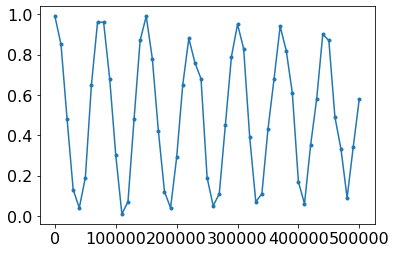

In [105]:
filename = df['filename_global'][0]
time1, global1 = readFile(filename)
plt.plot(time1, global1, '.-')

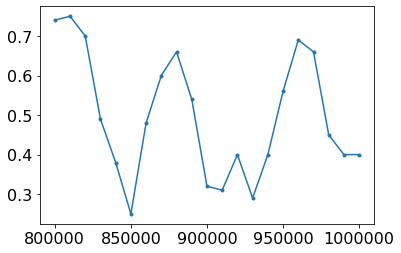

In [106]:
filename = df['filename_global'][1]
time2, global2 = readFile(filename)
plt.plot(time2, global2, '.-')

In [107]:
time_global = np.append(time1, time2)
ramsey_global = np.append(global1, global2)

[ 1.00000000e+00 -2.24283423e-01  7.35809610e+04  1.60044313e+06]
sigma_tau =  257886.10369641887


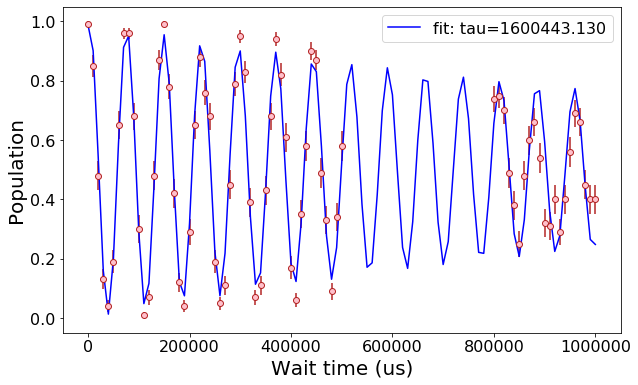

In [108]:
xdata = time_global
ydata = ramsey_global
guess=[1,0.1*np.pi, 80000, 500000]
popt, sigma_A = FitRamsey(xdata, ydata, guess)

# Ind 1 co-prop

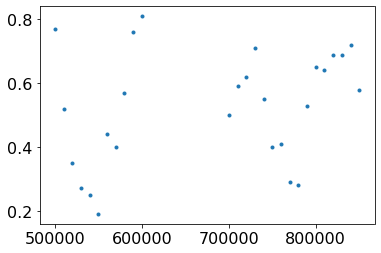

In [102]:
time_ind = np.empty((0, 0))
ramsey_ind = np.empty((0, 0))
for i in [1,2]:
    filename = df['filename_ind'][i]
    t, ramsey = readFile(filename)
    time_ind = np.append(time_ind, t)
    ramsey_ind = np.append(ramsey_ind, ramsey)
plt.plot(time_ind, ramsey_ind, '.')

[ 1.00000000e+00 -1.73252791e+00  1.13749048e+05  8.70506674e+05]
sigma_tau =  591109.746485581


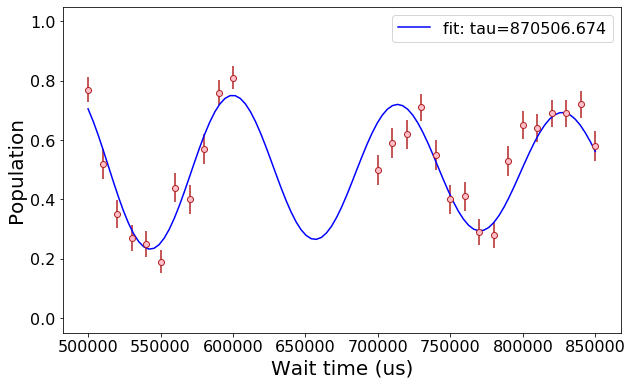

In [109]:
xdata = time_ind
ydata = ramsey_ind
guess=[1,0.1*np.pi, 120000, 1000000]
popt, sigma_A = FitRamsey(xdata, ydata, guess)

Text(0, 0.5, 'Population')

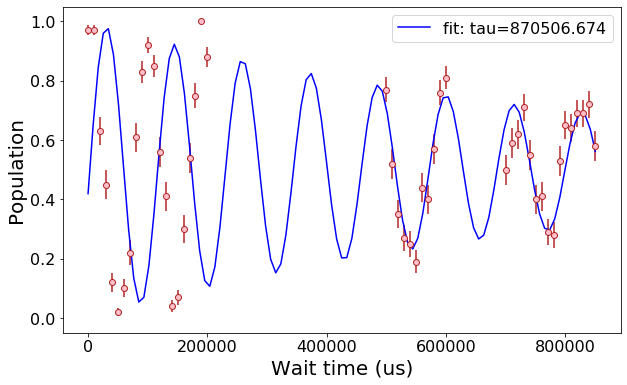

In [110]:
time_ind2 = np.empty((0, 0))
ramsey_ind2 = np.empty((0, 0))
for i in [0,1,2]:
    filename = df['filename_ind'][i]
    t, ramsey = readFile(filename)
    time_ind2 = np.append(time_ind2, t)
    ramsey_ind2 = np.append(ramsey_ind2, ramsey)


plt.figure(figsize=(10,6))
tlist = np.linspace(time_ind2[0], time_ind2[-1], 101)
plt.plot(tlist, func(tlist, *popt), 'b-', label='fit: tau=%5.3f' % popt[3])
plt.errorbar(time_ind2, ramsey_ind2, yerr=np.sqrt(ramsey_ind2*(1-ramsey_ind2)/100),\
             ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
plt.legend()
plt.ylim([-0.05,1.05])
plt.xlabel('Wait time (us)')
plt.ylabel('Population')

# Counter-prop

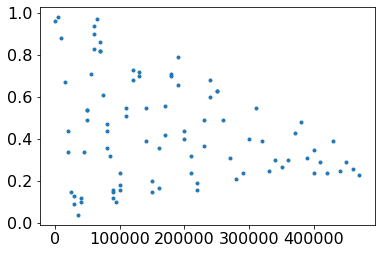

In [115]:
time_counter = np.empty((0, 0))
ramsey_counter = np.empty((0, 0))
for i in [0,1,2,3]:
    filename = df['filename_counter'][i]
    t, ramsey = readFile(filename)
    time_counter = np.append(time_counter, t)
    ramsey_counter = np.append(ramsey_counter, ramsey)
plt.plot(time_counter, ramsey_counter, '.')

[ 1.00000000e+00 -2.83366282e-01  6.11960017e+04  3.20339212e+05]
sigma_tau =  45399.26404066938


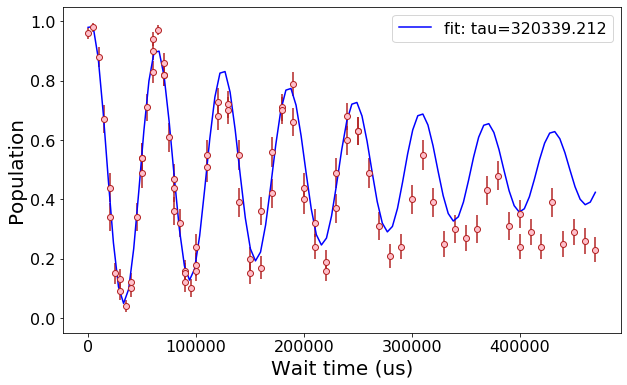

In [118]:
xdata = time_counter
ydata = ramsey_counter
guess=[1,0.1*np.pi, 60000, 200000]
popt, sigma_tau = FitRamsey(xdata, ydata, guess)